In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ

import ramsey_experiment

# Loading your IBM Quantum account(s)
IBMQ.save_account(os.environ.get('IBM_KEY'), overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')



C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
ibmqfactory.load_account:WARNING:2024-01-04 11:20:26,371: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
h = lambda n, J, z: sum([J[i] * (z[i] - 1) * (z[(i + 1) % n] - 1) for i in range(n - 1)])


def effective_hem(size, J, W):
    hem = np.zeros((2 ** size, 2 ** size))
    for i in range(2 ** size):
        binary = '{0:b}'.format(i).zfill(size)
        Z = [(-1) ** int(i) for i in binary]
        #Z.reverse()
        hem[i, i] = h(size, J, Z)
        hem[i, i] += sum([W[k] for k in range(size) if binary[k] == '1'])
    return hem

J =  [2.389362795607367, 2.6893492766819036, 4.3489091248665375, 3.6201418301199446]
W =  [3, 3, 3, 3, 3]


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


0.0
0.09519977738150888
0.19039955476301776
0.28559933214452665
0.3807991095260355
0.4759988869075444
0.5711986642890533
0.6663984416705622
0.761598219052071
0.8567979964335799
0.9519977738150888
1.0471975511965976
1.1423973285781066
1.2375971059596154
1.3327968833411243
1.427996660722633
1.523196438104142
1.618396215485651
1.7135959928671598
1.8087957702486688
1.9039955476301775
1.9991953250116865
2.0943951023931953
2.1895948797747042
2.284794657156213
2.379994434537722
2.4751942119192307
2.5703939893007397
2.6655937666822487
2.7607935440637577
2.855993321445266
2.951193098826775
3.046392876208284
3.141592653589793
3.236792430971302
3.3319922083528106
3.4271919857343196
3.5223917631158286
3.6175915404973376
3.712791317878846
3.807991095260355
3.903190872641864
3.998390650023373
4.093590427404882
4.1887902047863905
4.2839899821679
4.3791897595494085
4.474389536930917
4.569589314312426
4.664789091693935
4.759988869075444
4.855188646456953
4.9503884238384614
5.045588201219971
5.140787978

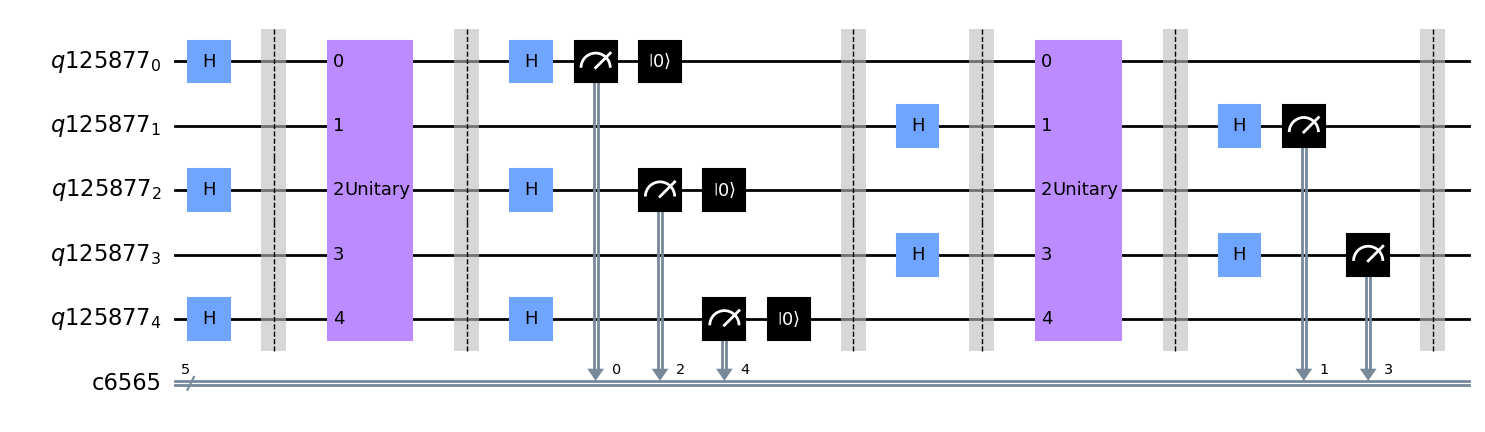

In [284]:
import Ramsey_ExperimentV2
import random
import importlib

ramsey_experiment = importlib.reload(Ramsey_ExperimentV2)
RamseyExperiment = ramsey_experiment.RamseyExperiment
RamseyBatch = ramsey_experiment.RamseyBatch

n = 5
T = 3 * np.pi

W = [random.gauss(3, 1) for _ in range(n)]
L = [random.gauss(1, 1) for _ in range(n)]
J = [random.gauss(3, 1) for _ in range(n - 1)]

L = [0, 1, 2, 3, 6]
W = [3, 3, 3, 3, 3]

# W = [3]
# L = [3]

shots = 100

print("J = ", J)
print("W = ", W)

delay_list = []
exp = []
measurements = 100
delay = np.linspace(0, T, measurements)
for t in delay:
    exp = RamseyExperiment(n, t, shots, J, W, L)
    exp.create_circuit_detuning()
    exp.add_noise()
    delay_list.append(exp)
    print(t)
ramseyBatch1 = RamseyBatch(delay_list)
delay_list[1].circuit.draw(output='mpl')  # 'mpl' for matplotlib drawing

#print(effective_hem(3,J,W))

In [4]:
print(ramseyBatch1.RamseyExperiments[70].result.get_counts())
print(ramseyBatch1.RamseyExperiments[70].W)

print(effective_hem(ramseyBatch1.RamseyExperiments[70].n, ramseyBatch1.RamseyExperiments[70].J,
                    ramseyBatch1.RamseyExperiments[70].W))

{'00001': 3, '10000': 8, '10001': 2, '01000': 9, '00000': 35, '10011': 2, '00100': 12, '01110': 1, '01100': 4, '00010': 6, '00011': 4, '01101': 2, '10110': 1, '01010': 1, '00101': 1, '11000': 2, '01011': 1, '10100': 1, '01001': 2, '10010': 1, '00111': 1, '11100': 1}
[3, 3, 3, 3, 3]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          3.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          3.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 31.54096209  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         45.80792757
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  58.87837052]]


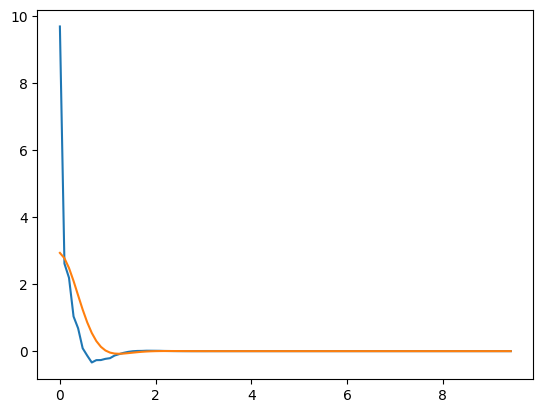

In [287]:
from scipy.ndimage import gaussian_filter

k = 3
y = ramseyBatch1.get_zi(k)
#plt.semilogy(delay,y)

y_smooth = gaussian_filter(y, sigma=4)
#plt.plot(delay,y)
plt.plot(delay,y)
plt.plot(delay,y_smooth)

Weighted median frequency: 4.666666666666667


C:\Users\user\AppData\Local\Temp\ipykernel_28716\244648355.py:49: RuntimeWarning: invalid value encountered in sqrt
  -np.sqrt(
C:\Users\user\AppData\Local\Temp\ipykernel_28716\244648355.py:51: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(


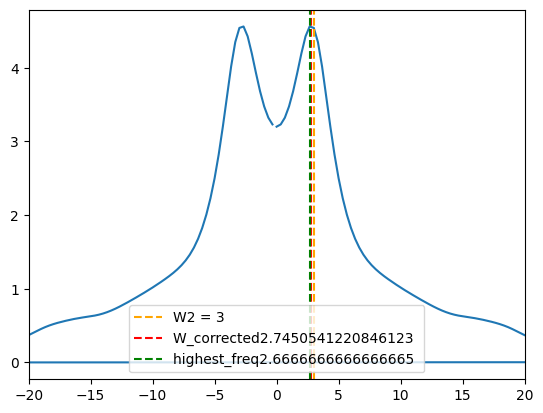

In [293]:
#%matplotlib notebook
from scipy.signal import find_peaks

k = 2

extended = ramseyBatch1.get_zi(k)[::-1]
extended = extended + ramseyBatch1.get_zi(k)
#extended = gaussian_filter(extended, sigma=0.5)
fft_output_ext = np.fft.fft(extended) / 10

import numpy as np
import matplotlib.pyplot as plt

# Set the sampling rate based on measurements
sample_rate = measurements / T

# Compute the positive frequencies for the FFT output
frequencies_ext = np.fft.fftfreq(len(extended), 1 / sample_rate)

frequencies_ext *= (2 * np.pi)
positive_indices = np.where(frequencies_ext > 0)
positive_magnitudes = np.abs(fft_output_ext)[positive_indices]

frequencies = frequencies_ext[positive_indices]
weights = np.abs(fft_output_ext)[positive_indices]

# Calculating cumulative weights
cumulative_weights = np.cumsum(weights)

# Finding the median position
total_weight = np.sum(weights)
half_total_weight = total_weight / 2

median_index = np.where(cumulative_weights >= half_total_weight)[0][0]
weighted_median_frequency = frequencies[median_index]

print(f'Weighted median frequency: {weighted_median_frequency}')
# Plot and annotate results
plt.plot(frequencies_ext, np.abs(fft_output_ext))
plt.axvline(x=W[k], color='orange', linestyle='--', label=f'W{k} = {W[k]}')
# plt.axvline(x=weighted_median_frequency, color='green', linestyle='--', label=f'W_found{weighted_median_frequency} ')

a = L[k]


highest_freq = frequencies[np.argmax(positive_magnitudes)]

w_solutions = [
    -np.sqrt(
        -a ** 2 / 3 + highest_freq ** 2 / 3 - 2 * np.sqrt(a ** 4 + a ** 2 * highest_freq ** 2 + highest_freq ** 4) / 3),
    np.sqrt(
        -a ** 2 / 3 + highest_freq ** 2 / 3 - 2 * np.sqrt(a ** 4 + a ** 2 * highest_freq ** 2 + highest_freq ** 4) / 3),
    -np.sqrt(
        -a ** 2 / 3 + highest_freq ** 2 / 3 + 2 * np.sqrt(a ** 4 + a ** 2 * highest_freq ** 2 + highest_freq ** 4) / 3),
    np.sqrt(-(a ** 2) / 3 + (highest_freq ** 2) / 3 + 2 * np.sqrt(
        a ** 4 + (a ** 2) * highest_freq ** 2 + highest_freq ** 4) / 3)
]
plt.axvline(x=w_solutions[3], color='red', linestyle='--', label=f'W_corrected{w_solutions[3]} ')

y_lornz = lambda a, x, w: np.pi*(2 * a / (a ** 2 + (x - w) ** 2) + 2 * a / (a ** 2 + (x + w) ** 2))

def sinc(x_values):
    X = []
    for x in x_values:
        X.append((np.sin(2*x * np.pi) / (2*x * np.pi) if x != 0 else 1))
    return X

frequencies_ext_sorted = np.sort(frequencies_ext)
Y1 = y_lornz(a, frequencies_ext_sorted, W[k]) * np.sqrt(np.pi)
Y2 = sinc(frequencies_ext_sorted)
Y = np.convolve(Y2, Y1, mode='same')

# N = len(frequencies_ext)
# delta = frequencies_ext[1] - frequencies_ext[0]
# new_x_values = np.linspace(2*frequencies_ext[0], (2*N-2)*delta, 2*N-1)


# start_index = (len(Y) - len(frequencies_ext)) // 2 + 100
# end_index = start_index + len(frequencies_ext)
# Y = Y[start_index:end_index]

#plt.plot(frequencies_ext_sorted, Y1, label='lorenzian',color='red')

#plt.plot(frequencies_ext_sorted, Y2)

#plt.plot(frequencies_ext_sorted, np.abs(Y), label='theory',color='red')
plt.axvline(x=highest_freq, color='green', linestyle='--', label=f'highest_freq{highest_freq} ')
plt.xlim([-20,20])
plt.legend()
plt.show()

In [251]:
print(len(frequencies_ext))
print(np.abs(fft_output_ext)[1100])
print(np.abs(fft_output_ext))

2000
0.012848735040966442
[2.92592741 2.92438691 2.91960857 ... 2.911139   2.91960857 2.92438691]


In [149]:
import pandas as pd
#pandas from array
df = pd.DataFrame({'frequencies': frequencies_ext_sorted, 'magnitudes': np.abs(Y)})
df.tail

<bound method NDFrame.tail of       frequencies  magnitudes
0     -333.333333    0.020791
1     -333.000000    0.069737
2     -332.666667    0.068830
3     -332.333333    0.018601
4     -332.000000    0.043754
...           ...         ...
1995   331.666667    0.023929
1996   332.000000    0.040587
1997   332.333333    0.068821
1998   332.666667    0.041378
1999   333.000000    0.020494

[2000 rows x 2 columns]>

C:\Users\user\AppData\Local\Temp\ipykernel_28716\150811007.py:45: RuntimeWarning: invalid value encountered in sqrt
  -np.sqrt(-a ** 2 / 3 + highest_freq ** 2 / 3 - 2 * np.sqrt(
C:\Users\user\AppData\Local\Temp\ipykernel_28716\150811007.py:47: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-a ** 2 / 3 + highest_freq ** 2 / 3 - 2 * np.sqrt(


IndexError: index 0 is out of bounds for axis 0 with size 0

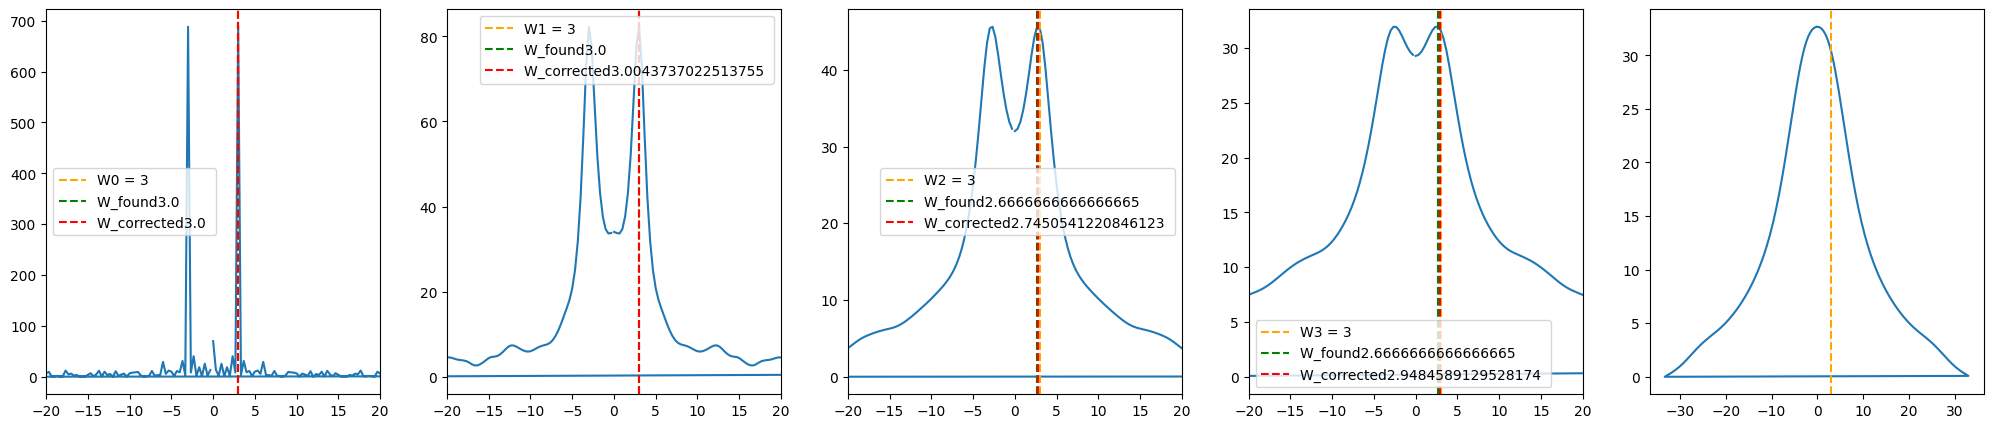

In [292]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Set the range for k

# Create subplots
fig, axs = plt.subplots(1, n, figsize=(5 * n, 5))  # Adjust figsize as needed

# Iterate over each k
for k in range(n):
    extended = ramseyBatch1.get_zi(k)[::-1]
    extended = extended + ramseyBatch1.get_zi(k)
    fft_output_ext = np.fft.fft(extended)

    # Set the sampling rate based on measurements
    sample_rate = measurements / T

    # Compute the positive frequencies for the FFT output
    frequencies_ext = np.fft.fftfreq(2 * len(ramseyBatch1.get_zi(k)), 1 / sample_rate)
    frequencies_ext *= (2 * np.pi)
    positive_indices = np.where(frequencies_ext > 0)
    positive_magnitudes = np.abs(fft_output_ext)[positive_indices]

    # Find peaks in the positive magnitudes
    peaks, _ = find_peaks(positive_magnitudes)

    # Get the magnitudes of these peaks
    peak_magnitudes = positive_magnitudes[peaks]

    # Sort the peaks by their magnitudes in descending order
    sorted_peak_indices = np.argsort(peak_magnitudes)[::-1]
    n_highest_peaks = sorted_peak_indices[:3]

    # Plot and annotate results on the respective subplot
    axs[k].plot(frequencies_ext, np.abs(fft_output_ext))
    axs[k].axvline(x=W[k], color='orange', linestyle='--', label=f'W{k} = {W[k]}')

    highest_freq = frequencies_ext[positive_indices][peaks[n_highest_peaks[0]]]
    axs[k].axvline(x=highest_freq, color='green', linestyle='--', label=f'W_found{highest_freq} ')

    a = L[k]

    w_solutions = [
        -np.sqrt(-a ** 2 / 3 + highest_freq ** 2 / 3 - 2 * np.sqrt(
            a ** 4 + a ** 2 * highest_freq ** 2 + highest_freq ** 4) / 3),
        np.sqrt(-a ** 2 / 3 + highest_freq ** 2 / 3 - 2 * np.sqrt(
            a ** 4 + a ** 2 * highest_freq ** 2 + highest_freq ** 4) / 3),
        -np.sqrt(-a ** 2 / 3 + highest_freq ** 2 / 3 + 2 * np.sqrt(
            a ** 4 + a ** 2 * highest_freq ** 2 + highest_freq ** 4) / 3),
        np.sqrt(-(a ** 2) / 3 + (highest_freq ** 2) / 3 + 2 * np.sqrt(
            a ** 4 + (a ** 2) * highest_freq ** 2 + highest_freq ** 4) / 3)
    ]
    axs[k].axvline(x=w_solutions[3], color='red', linestyle='--', label=f'W_corrected{w_solutions[3]} ')

    axs[k].legend()
    axs[k].set_xlim([-20, 20])  # Adjust as needed

# Display the plot
plt.show()
